# EXPLORATORY DATA ANALYSIS (EDA)

## Read the data

In [2]:
## Imports
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

sars_data = pd.read_csv('sars_2003_dataset.csv',)

## Get an overview of the dataset:

In [3]:
sars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          2538 non-null   object
 1   Country                       2538 non-null   object
 2   Cumulative number of case(s)  2538 non-null   int64 
 3   Number of deaths              2538 non-null   int64 
 4   Number recovered              2538 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 99.3+ KB


## Print the first five and last five rows of the dataset

In [4]:
sars_data.head()

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0


In [5]:
sars_data.tail()

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
2533,2003-07-11,Switzerland,1,0,1
2534,2003-07-11,Thailand,9,2,7
2535,2003-07-11,United Kingdom,4,0,4
2536,2003-07-11,United States,75,0,67
2537,2003-07-11,Viet Nam,63,5,58


## Find the summary statistics of the dataset

In [6]:
sars_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cumulative number of case(s),2538.0,219.211978,825.024564,0.0,1.0,3.0,14.75,5329.0
Number of deaths,2538.0,17.812845,61.425627,0.0,0.0,0.0,2.00,348.0
Number recovered,2538.0,134.678487,581.595350,0.0,1.0,2.0,9.00,4941.0


## Find the total count and total percentage of missing values in each column of the DataFrame and display them for columns having at least one null value, in descending order of missing percentages.

In [7]:
mask = sars_data.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
Date,0,0.0
Country,0,0.0
Cumulative number of case(s),0,0.0
Number of deaths,0,0.0
Number recovered,0,0.0


## Regression plot

<Axes: xlabel='Cumulative number of case(s)', ylabel='Number of deaths'>

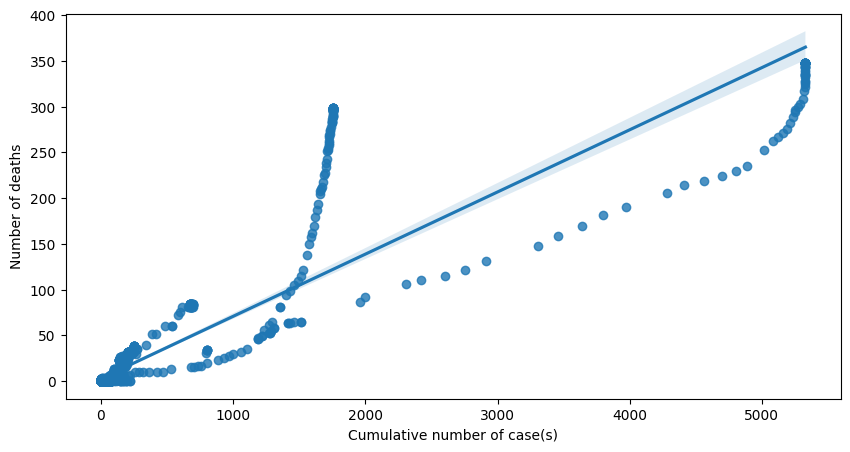

In [65]:
plt.figure(figsize = [10,5])
sns.regplot(x=sars_data['Cumulative number of case(s)'],y=sars_data['Number of deaths'])

## Plot the nullity matrix and nullity correlation heatmap.

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


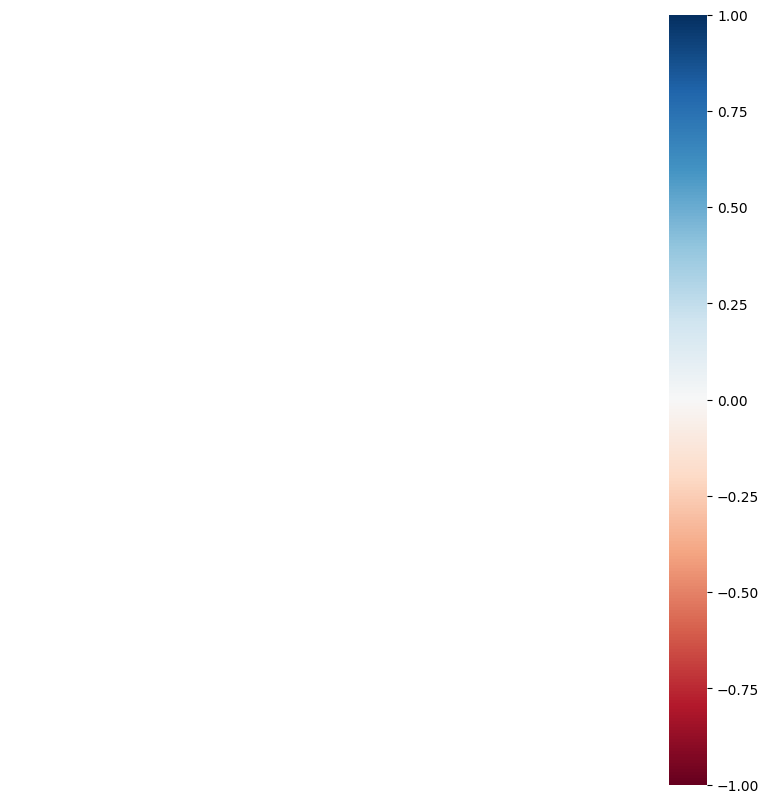

In [8]:
nullable_columns = sars_data.columns[mask.any()].tolist()
msno.heatmap(sars_data[:], figsize=(10,10))
plt.show()

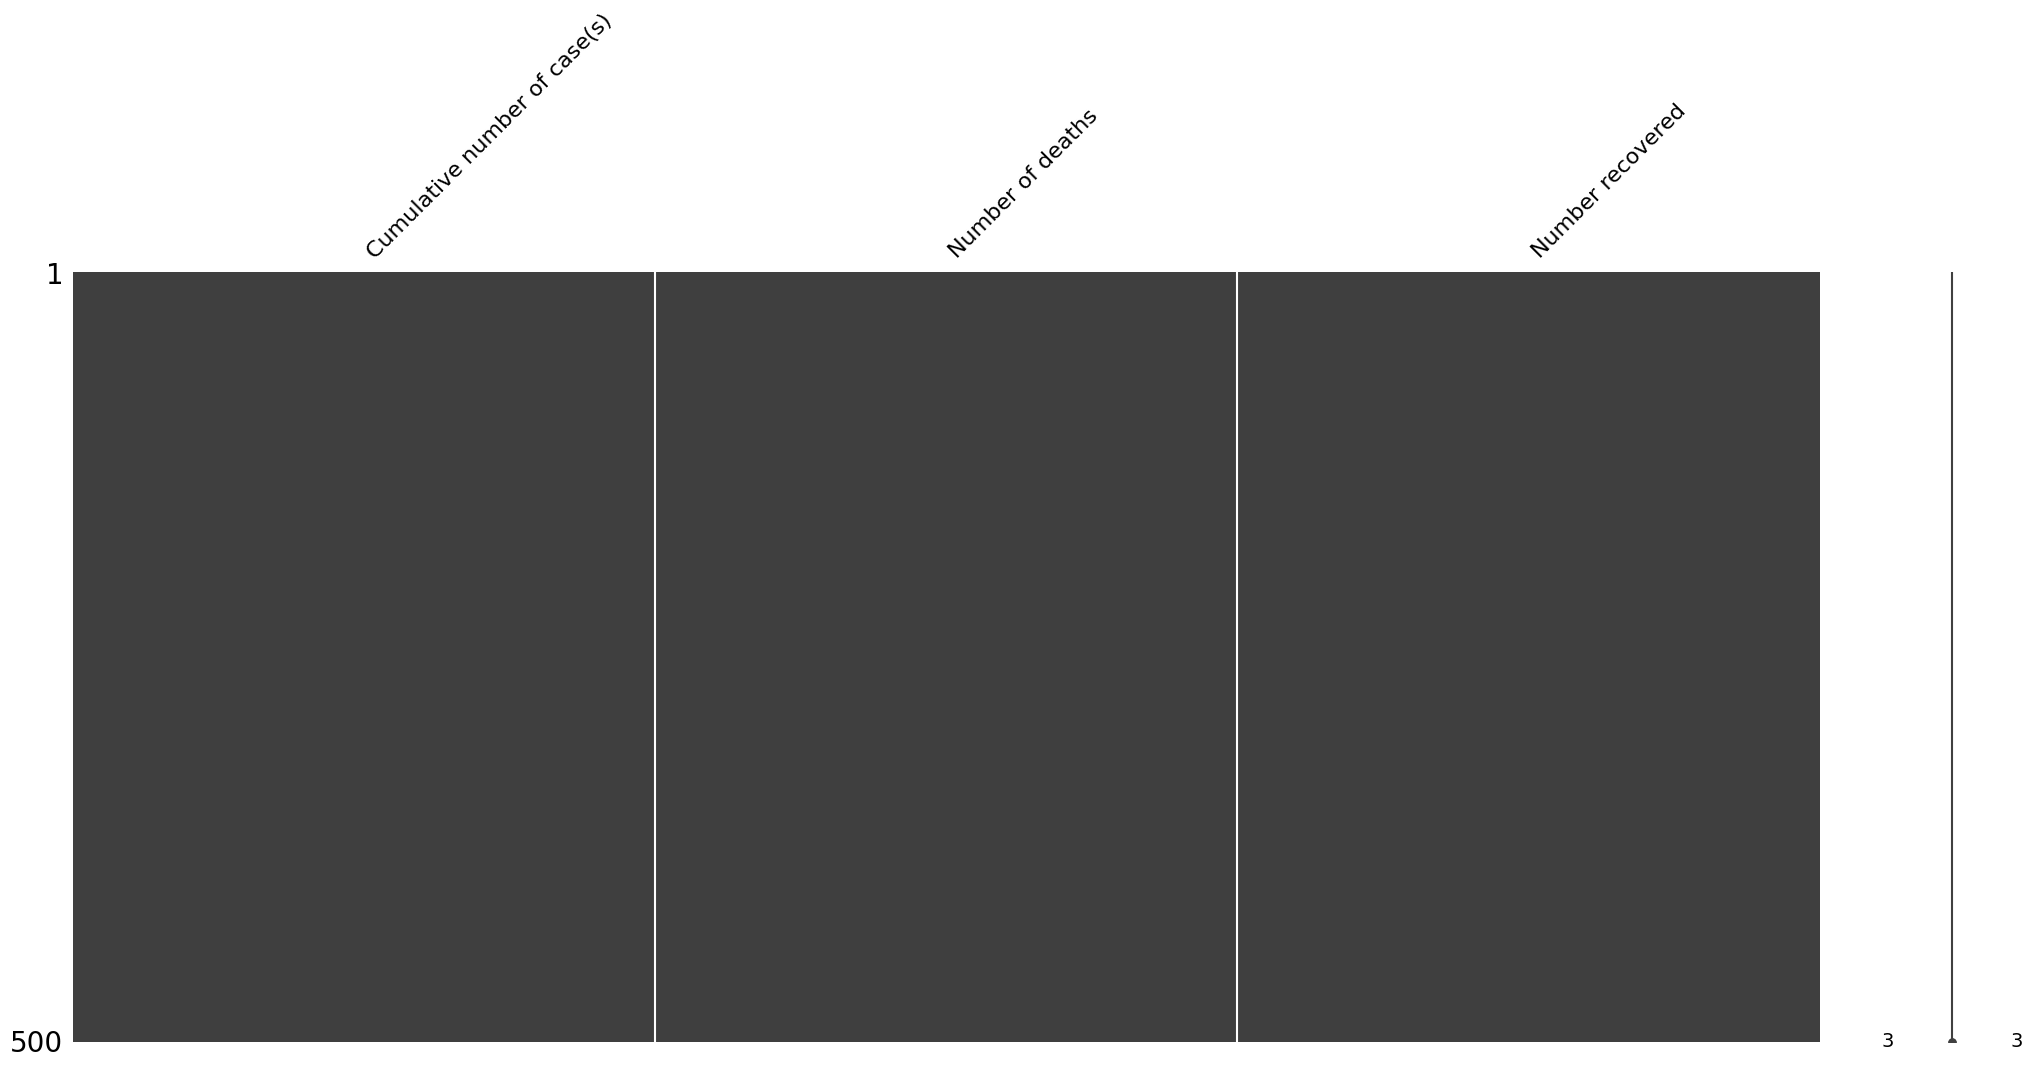

In [67]:
msno.matrix(sars_data[:].sample(500))
plt.show()

### Perform simple geospatial analysis

In [22]:
import plotly.express as px

avg_number_of_cases = sars_data.groupby('Country', as_index=False)['Cumulative number of case(s)'].mean()

fig1 = px.choropleth(avg_number_of_cases,
                     locations='Country',
                     locationmode='country names',
                     color='Cumulative number of case(s)',
                     hover_name='Country',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Number of Cases by Country',
                     labels={'Number of Cases': 'Average Number of Cases'},
                     projection='natural earth')

fig1.show()


In [13]:
avg_death_by_country = sars_data.groupby('Country', as_index=False)['Number of deaths'].mean()

fig1 = px.choropleth(avg_death_by_country,
                     locations='Country',
                     locationmode='country names',
                     color='Number of deaths',
                     hover_name='Country',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Number of Deaths by Country',
                     labels={'Number of deaths': 'Average Number of Deaths'},
                     projection='natural earth')

fig1.show()


In [23]:
avg_recoveries_by_country = sars_data.groupby('Country', as_index=False)['Number recovered'].mean()

fig1 = px.choropleth(avg_recoveries_by_country,
                     locations='Country',
                     locationmode='country names',
                     color='Number recovered',
                     hover_name='Country',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Number of Recoveries by Country',
                     labels={'Number of Recoveries': 'Average Number of Recoveries'},
                     projection='natural earth')

fig1.show()


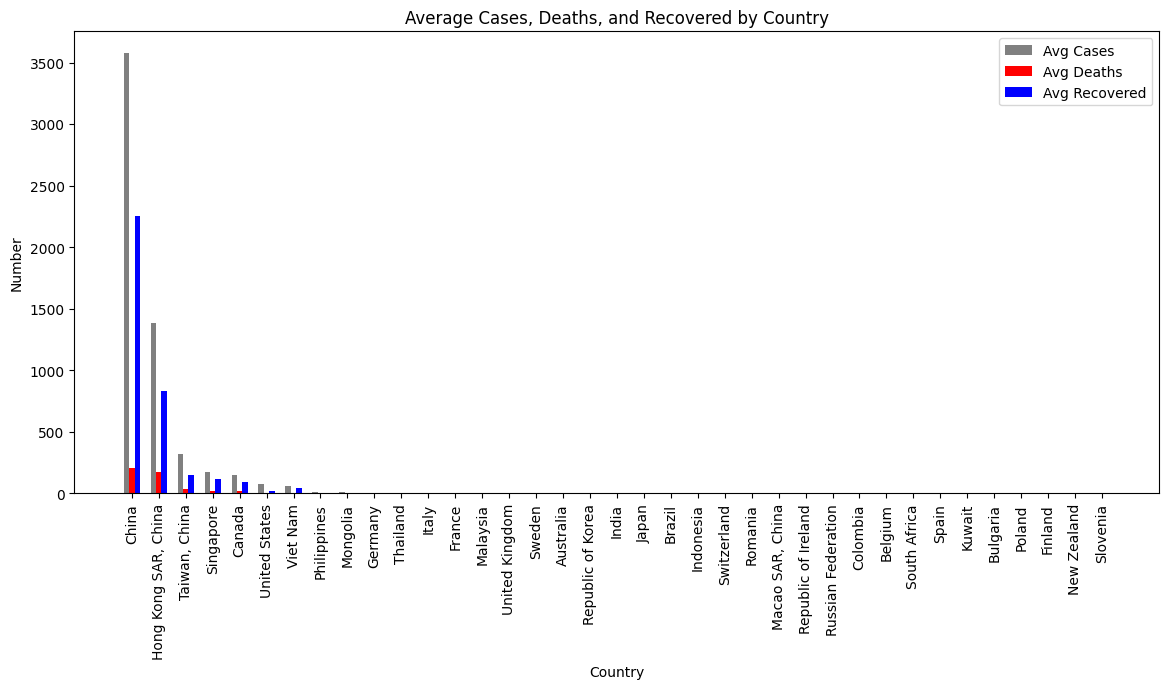

In [26]:
avg_data_by_country = sars_data.groupby('Country').agg({
    'Cumulative number of case(s)': 'mean',
    'Number of deaths': 'mean',
    'Number recovered': 'mean'
}).sort_values(by='Cumulative number of case(s)', ascending=False)

plt.figure(figsize=(14, 6))

positions = range(len(avg_data_by_country))
bar_width = 0.2

plt.bar(positions, avg_data_by_country['Cumulative number of case(s)'], width=bar_width, color='grey', label='Avg Cases')

plt.bar([p + bar_width for p in positions], avg_data_by_country['Number of deaths'], width=bar_width, color='red', label='Avg Deaths')

plt.bar([p + 2 * bar_width for p in positions], avg_data_by_country['Number recovered'], width=bar_width, color='blue', label='Avg Recovered')

plt.title('Average Cases, Deaths, and Recovered by Country')
plt.xlabel('Country')
plt.ylabel('Number')
plt.xticks([p + bar_width for p in positions], avg_data_by_country.index, rotation=90)
plt.legend(loc='upper right')

plt.show()

As we can see from the data China and its neighboring countries are the ones with the highest number of metrics recorded. This is due to SARS being an outbreak that emerged in China and spread to other countries.

## Delete the columns having more than 80% of values missing.

In [27]:
sars_data.Date = sars_data.Date.apply(pd.to_datetime)
from sklearn.preprocessing import LabelEncoder
encoded_labels = sars_data.select_dtypes(include = "object").columns
print(encoded_labels)
print(sars_data.Country)

Index(['Country'], dtype='object')
0                    Germany
1                     Canada
2                  Singapore
3       Hong Kong SAR, China
4                Switzerland
                ...         
2533             Switzerland
2534                Thailand
2535          United Kingdom
2536           United States
2537                Viet Nam
Name: Country, Length: 2538, dtype: object


In [28]:
LE = LabelEncoder()
sars_data.Country = LE.fit_transform(sars_data.Country)
sars_data.Country

0        9
1        4
2       26
3       10
4       31
        ..
2533    31
2534    33
2535    34
2536    35
2537    36
Name: Country, Length: 2538, dtype: int32

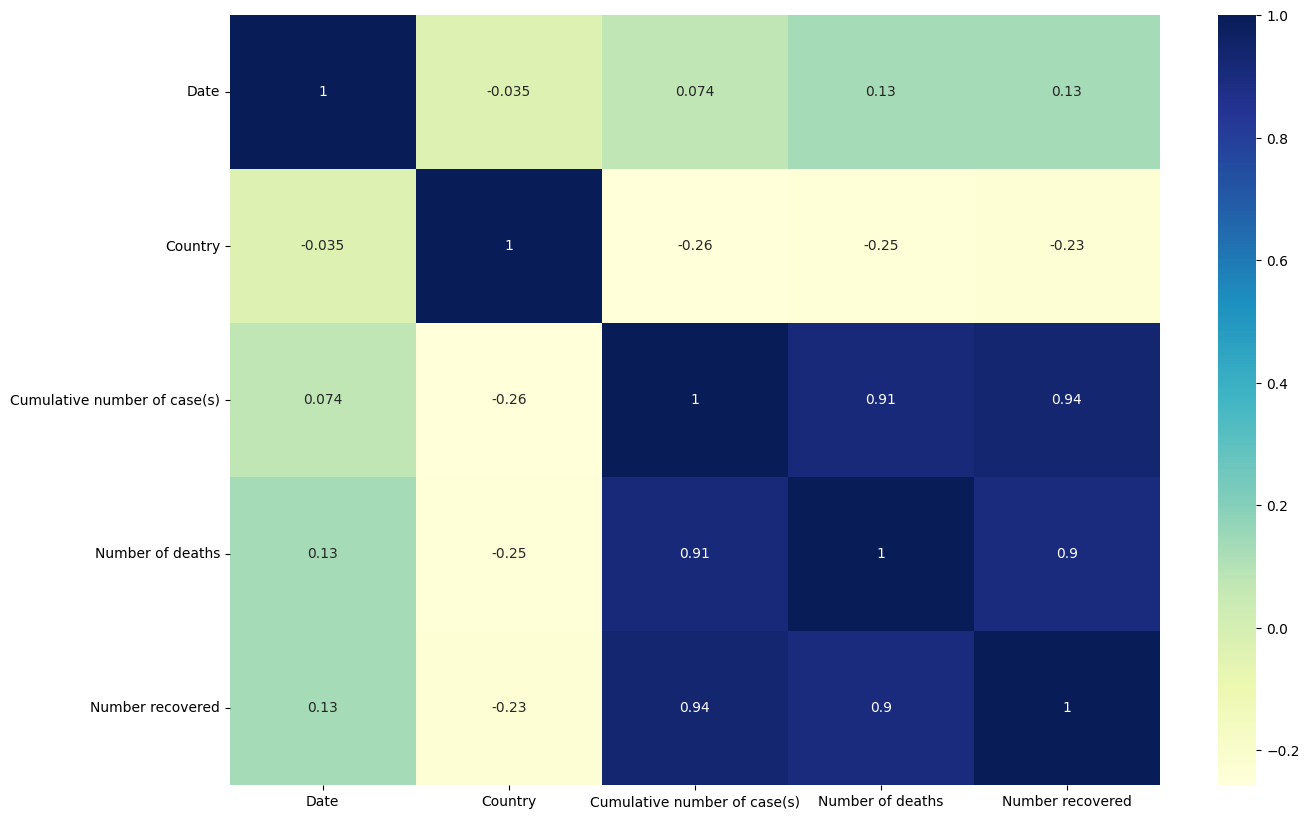

In [29]:
plt.figure(figsize=(15, 10))
sns.heatmap(sars_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

Dropping columns date and coutnry as they serve little correlation to the number of deaths

In [30]:
sars_data = sars_data.drop(['Date'], axis=1)
sars_data = sars_data.drop(['Country'], axis=1)
sars_data.head()

,Cumulative number of case(s),Number of deaths,Number recovered
0,1,0,0
1,8,2,0
2,20,0,0
3,95,1,0
4,2,0,0


In [31]:
sars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Cumulative number of case(s)  2538 non-null   int64
 1   Number of deaths              2538 non-null   int64
 2   Number recovered              2538 non-null   int64
dtypes: int64(3)
memory usage: 59.6 KB


## Export the Cleaned Dataset.

In [32]:
##Not sure if needed to export the already cleaned dataset to a different dataset but just to be safe.
sars_data.to_csv('sars_2003_dataset_v2.csv')


# IV.  AI MODELLING - APPLIED REGRESSION ANALYSIS (ARA)

## Read the cleaned data.

In [35]:
lin_sars_data = pd.read_csv('sars_2003_dataset_v2.csv')
lin_sars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Unnamed: 0                    2538 non-null   int64
 1   Cumulative number of case(s)  2538 non-null   int64
 2   Number of deaths              2538 non-null   int64
 3   Number recovered              2538 non-null   int64
dtypes: int64(4)
memory usage: 79.4 KB


## Construct a multiple linear regression model.

In [36]:
target = ['Number of deaths']
features = sars_data.columns.tolist()
del features[features.index('Number of deaths')]
features

['Cumulative number of case(s)', 'Number recovered']

In [37]:
target

['Number of deaths']

## Compute the performance of the model in terms of the R-squared value. <font color=red>Target Score: 80% and Above </font>.

In [48]:
model = LinearRegression()
model.fit(sars_data[features], sars_data[target].values.reshape((-1, 1)))
First_acc = model.score(sars_data[features], sars_data[target].values.reshape((-1, 1)))
print(First_acc * 100)

84.85219235559605


In [39]:
X = sars_data.drop(['Number of deaths'] , axis = 1)
y = sars_data['Number of deaths']

In [52]:
model = LinearRegression()
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

acc_lin_sars_data = model.score(X_test, y_test)
print(acc_lin_sars_data * 100)

89.78633097933108


In [60]:
pred = model.predict(X_test)
actual = y_test.tolist()

MAE = mean_absolute_error(pred, actual)
print('Mean absolute error:', MAE)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean absolute error: 8.753616832430655
R-squared: 0.8322931422738467


In [54]:
First_Acc = First_acc * 100
Second_Acc = acc_lin_sars_data * 100
print("Accuracy for the First Model:", First_Acc)
print("Accuracy for the Second Model:", Second_Acc)

Accuracy for the First Model: 84.85219235559605
Accuracy for the Second Model: 89.78633097933108
